In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## EDA

### 1. Univariate analysis

In [ ]:
df = pd.read_csv("concrete.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [ ]:
(df==0).sum() ## check number of zeros in the column

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


`No null values`

`Our target variable is strength i.e a continuous varibale. Hence we will use regressor version of all algorithms`


In [ ]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


`Slag, Ash and Superplastcizer can be zero. As Cement, water, coarseagg and fineagg are the important constituents of cement.`

`Age should not be zero.`

`Concrete starts developing strength after 24 hours, its gain approx 15% of its strength after 1 day and around 99% strength after 28 days. Therefore min age has to be 1.`

In [ ]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

`Age is highly skewed`

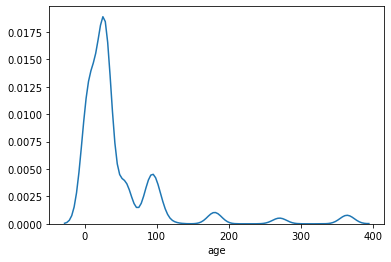

In [ ]:
# To see skewness of age
sns.distplot(df['age'],hist=False)
plt.show()

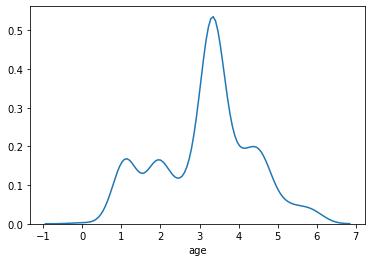

In [ ]:
# Skewness of Age after log transformation
sns.distplot(np.log(df['age']),hist=False)
plt.show()

In [ ]:
# log transformation to reduce skewness
df['age'] = np.log(df['age'])

### 2. Bi-variate analysis *(10 marks)*

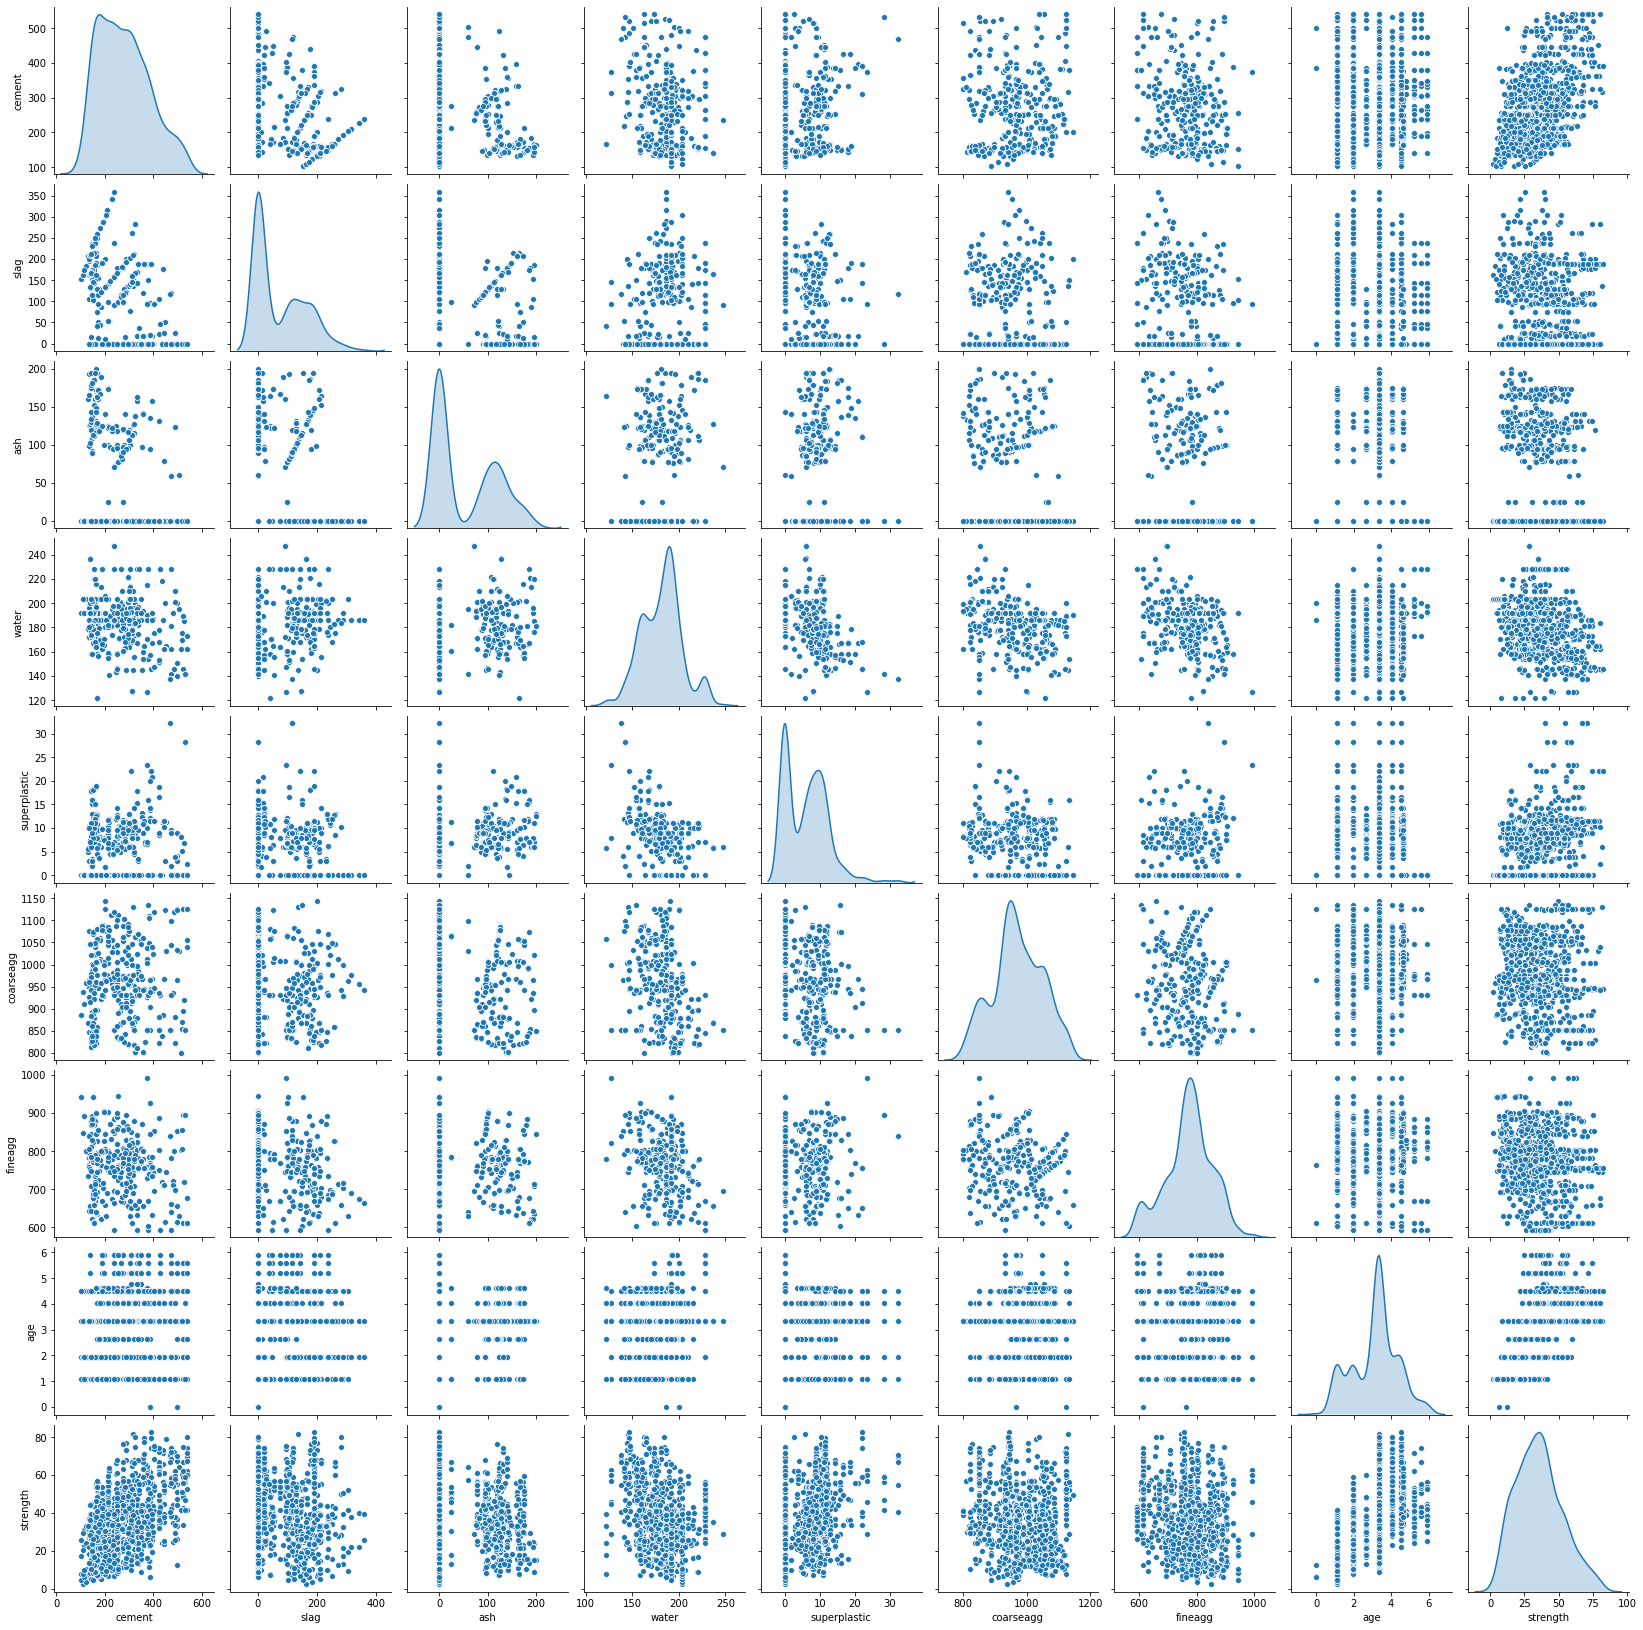

In [ ]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(df , diag_kind = 'kde')
plt.show()

`As age is increasing strength is increasing`

`Cement and strength have a linear relationship`

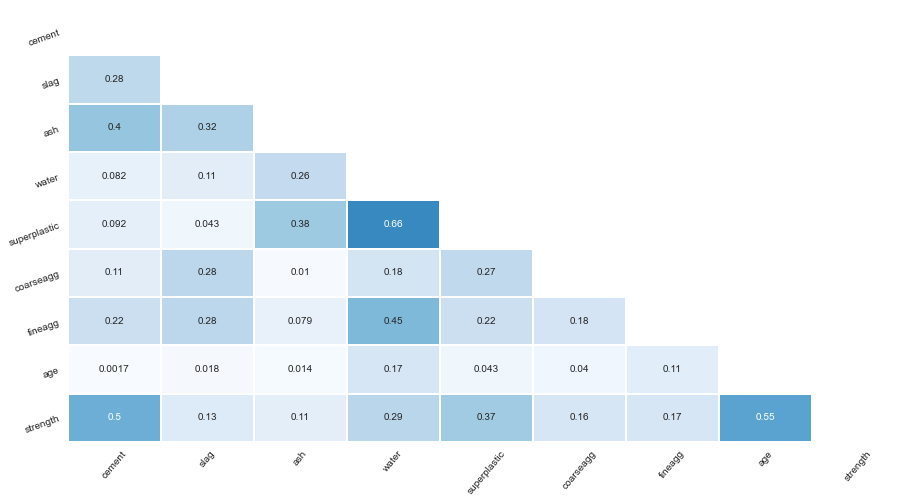

In [ ]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   
plt.yticks(rotation = 20)   
plt.show()

`"age", "cement" have the highest correlation with the target`

### 3. Feature Engineering techniques (10 marks)

In [ ]:
df['water:cement'] = df['water']/df['cement']  # Extracting a new column

In [ ]:
df['coarseagg:fineagg'] = df['coarseagg'] / df['fineagg'] # Extracting a new column

In [ ]:
df = df[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'water:cement', 'coarseagg:fineagg', 'strength']] # rearranging columns

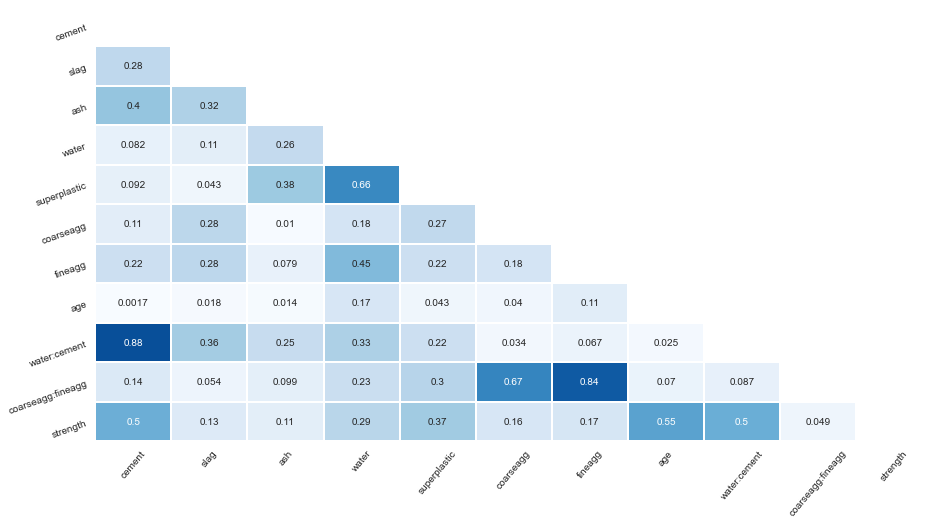

In [ ]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   
plt.yticks(rotation = 20)   
plt.show()

`So we can have w:c a feature in place of water and cement because it shows high correlation with strength`

`coarseagg:fineagg doesnt look good so we will drop it`

In [ ]:
df = df.drop(['cement','water','coarseagg:fineagg'],axis=1)

# As we already taken the info related to 'water' and 'cement' in 'water:cement' feature, therefore dropping 'water' and 'cement'
# 'coarseagg:fineagg' was not a feature because both columns individually provide more info

In [ ]:
# Separating dependent and independent variables
x = df.drop('strength',axis=1)
y = df['strength']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

In [ ]:
#Degree 1
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=7)

model.fit(xtrain,ytrain)

print(model.score(xtrain,ytrain))

print(model.score(xtest,ytest))

0.9953725270651557
0.8546550160042635


In [ ]:
#Degree 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=2, interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(xtrain,ytrain)

print(pipeline.score(xtrain,ytrain))

print(pipeline.score(xtest,ytest))

0.9953725270651557
0.8272324097156065


In [ ]:
#Degree 3

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=3,interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(xtrain,ytrain)

print(pipeline.score(xtrain,ytrain))

print(pipeline.score(xtest,ytest))

0.9953725270651557
0.8266623966810415


`As it is visible that highest testing score is in degree one so going forward with degree 1`

## Models

### 1. Different Models 

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
k =  KFold(random_state=7,n_splits=5)

# KFold will split the data in 5 equal parts

In [ ]:
algo= []
cv_r2_mean = []
cv_r2_std = []
cv_rmse_mean = []

# Blank lists to store model name, cross validated r2 score (mean and standard deviation) and RMSE

In [ ]:
# Linear Regression
## Since the dataset is small theefore using complete dataset for cv
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', LinearRegression())
])

pipeline.fit(xtrain,ytrain)


algo.append('Linear Regression')
cv_r2_mean.append(cross_val_score(pipeline, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

When we use mean squared error as scoring in cross val score it gives output with a negative sign. So we use Negative sign to make it positive.

In [ ]:
# Decision Tree

model = DecisionTreeRegressor(random_state=7)

model.fit(xtrain,ytrain)


algo.append('Decision Tree')
cv_r2_mean.append(cross_val_score(model, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)

model.fit(xtrain,ytrain)


algo.append('Random Forest')
cv_r2_mean.append(cross_val_score(model, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# Bagging
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=7)

model.fit(xtrain,ytrain)


algo.append('Bagging')
cv_r2_mean.append(cross_val_score(model, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=7)

model.fit(xtrain,ytrain)


algo.append('AdaBoost')
cv_r2_mean.append(cross_val_score(model, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7)

model.fit(xtrain,ytrain)

algo.append('Gradient Boosting')
cv_r2_mean.append(cross_val_score(model, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['CV R2 score mean'] = cv_r2_mean
results['CV R2 score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model')
results

,CV R2 score mean,CV R2 score std,CV RMSE
Model,,,
Linear Regression,0.749232,0.023925,8.287837
Decision Tree,0.858100,0.043419,6.194094
Random Forest,0.903111,0.019921,5.151309
Bagging,0.903134,0.019445,5.153697
AdaBoost,0.787276,0.024935,7.597878
Gradient Boosting,0.904819,0.016291,5.118409


`Gradient Boosting is the best algorithm here`

`Bagging and Random Forest are almost same, second best algorithms`

### 2. Hyper Parameter Tuning *(15 marks)*

**Grid Search on Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=7)

params = {
    'bootstrap': [True,False],
    'max_depth': [3,4,None],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,3, 4],
    'min_samples_split': [2,3,5],
    'n_estimators': [25,50,'warn']
}    

grid = GridSearchCV(estimator = rf, param_grid = params, cv = k)

grid.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn'...bs=None,
                                             oob_score=False, random_state=7,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
  

In [ ]:
from sklearn.metrics import mean_squared_error
model = ['Random forest after Grid search']
tr = [grid.score(xtrain,ytrain)]
te = [grid.score(xtest,ytest)]
rmse = [mean_squared_error(ytest,grid.predict(xtest))**0.5]

**Random Search on Gradient Boosting**

In [ ]:
gb = GradientBoostingRegressor(random_state=7)
gb.fit(xtrain,ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=7,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 25 numbers
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Create the random grid
params_r = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'learning_rate':learning_rate}

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=gb, param_distributions=params_r,cv = k, random_state=7)

# Fit the random search model
random.fit(xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                               

In [ ]:
random.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'learning_rate': 0.1}

In [ ]:
model.append('Gradient Boosting after RandomCV')
tr.append(random.score(xtrain,ytrain))
te.append(random.score(xtest,ytest))
rmse.append(mean_squared_error(ytest,random.predict(xtest))**0.5)

In [ ]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = tr
results['Testing Score'] = te
results['RMSE'] = rmse
results = results.set_index('Model')
results

,Training Score,Testing Score,RMSE
Model,,,
Random forest after Grid search,0.995372,0.921330,4.510273
Gradient Boosting after RandomCV,0.994772,0.930501,4.239225


`Gradient Boosting gives better results after hyperparameter tuning as well`

`Hence our final model was able to explain 93.08 % variance was explained by the model from all the independent variables with RMSE score of 4.2 Mpa in concrete strength`
